# HW-3: 

Author: J. Hickman

**Overview:**
* In deep learning we don't always have to train our neural networks from scratch
* Often "pre-trained models" exist which we can "pull of the shelf" and use as part of a data processing pipeline. 
* In this assignment, we will use the popular "You only look once" (YOLO) deep learning algorithm to do object detection.
  * https://pytorch.org/hub/ultralytics_yolov5/
* Assume you are working for a company interested in traffic patterns and driver behavior 
  * For example, a car-insurance company, a traffic data analytics firm, or a self driving car start-up 
* This company has "dash-camera" footage from various cars in their "fleet" 
* As an initial proof of concept they want you to write a code to track the locations of other vehicles from the recordings 
* They also want you to analyze the time-dependence of traffic patterns found in the videos.

**Submission:**
* You need to upload ONE document to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of the "HW-3.ipynb" document 
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc
* **Total points:** 41.66

**Note**:
* There are many ways to do this assignment and the methods below are guidelines not rules.
* If you find more efficient ways to complete the objectives then feel free to do it however you want. 
* **IMPORTANT: START SMALL THEN SCALE UP** 
  * Get everything working for a simple case with a few images, once everything seems to be working correctly then run it on the entire data set

**Data source**:
* Dash cam footage: https://www.youtube.com/watch?v=9qy4lExIetk
* Website to download youtube videos: https://en.y2mate.is/67/



### Import

In [1]:
import torch
from IPython.display import Image
import matplotlib.pyplot as plt
import shutil 
import os

print(torch.__version__)

1.12.1+cu113


#### Part-3.0 

Open the file "video-res-2.mp4" and watch a few minutes to get familiar with the content

#### Part-3.1: Pre-processing

* The video is 2hr8min55s which is 2*60*60+8*60+55=7735 seconds 
* The frame rate for the video is roughly 30 frames per second 
* So there are around 7735*30=232050 frames
* Write code to read and convert the video "video-res-2.mp4" into an ORDERED set of images 
* Include a parameter to save frames every N seconds 
* Don't save every frame, at first save frames every 50 seconds, that will be around 155 images
* Once everything is working, save frames every 10 seconds and re-run the code for the final product.
* Save the images to a folder "frames" with the convention 
  * "frames/00010.jpg" for the frame 10 seconds into the video
  * "frames/00020.jpg" for the frame 20 seconds into the video and so on


In [2]:
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import cv2
vidcap = cv2.VideoCapture('/content/gdrive/MyDrive/HW-3/video-res-2.mp4')

In [5]:
# frame
currentframe = 1

i = 1

while(True):
  ret,frame = vidcap.read()

  if ret:
    framerate = 30*10
    if (currentframe%framerate == 0):
      name = '/content/gdrive/MyDrive/HW-3/frames/' + str(0)*(5-len(str(10*i)))+str(10*i) + '.jpg'
      #print ('Creating...' + name)


      # writing the extracted images
      cv2.imwrite(name, frame)
      i+=1
    currentframe += 1
  else:
    break

vidcap.release()

#### Part-3.2: Explore the model 

Before processing the video data, we want to make sure we can get YOLO working correctly for a few images

In [6]:
#INSERT CODE TO LOAD THE YOLO MODEL USING PYTORCH
model = torch.hub.load("ultralytics/yolov5","yolov5s", pretrained = True)

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
INFO:yolov5:requirements: YOLOv5 requirement "ipython" not found, attempting AutoUpdate...
requirements: YOLOv5 requirement "ipython" not found, attempting AutoU

  0%|          | 0.00/14.1M [00:00<?, ?B/s]

INFO:yolov5:

INFO:yolov5:Fusing layers... 
Fusing layers... 
INFO:yolov5:YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
INFO:yolov5:Adding AutoShape... 
Adding AutoShape... 


In [7]:
# AT FIRST USE THE FOLLOWING IMAGES AS A TEST CASE
images=['/content/gdrive/MyDrive/HW-3/frames/00050.jpg','/content/gdrive/MyDrive/HW-3/frames/00200.jpg']  

In [8]:
# INSERT CODE TO EVALUATE THE YOLO MODEL ON THESE IMAGES
results = model(images)

In [9]:
# WHEN WORKING IN PYTHON WITH AN OBJECT OF AN UN-FAMILIAR CLASS IT IS 
# VERY USEFUL TO FIGURE OUT THE CLASSES ATTRIBUTES AND METHOD
print(type(results))

<class 'models.common.Detections'>


In [10]:
# INSERT CODE TO FIGURE OUT WHAT THE OBJECTS ATTRIBUTES OF THE "results" OBJECT ARE
dir(results)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_run',
 'crop',
 'files',
 'ims',
 'n',
 'names',
 'pandas',
 'pred',
 'print',
 'render',
 's',
 'save',
 'show',
 't',
 'times',
 'tolist',
 'xywh',
 'xywhn',
 'xyxy',
 'xyxyn']

In [11]:
#  INSERT CODE TO FIGURE OUT WHAT THE OBJECTS METHODS OF THE "results" OBJECT ARE
object_methods = [method_name for method_name in dir(results)
                  if callable(getattr(results, method_name))]
object_methods

['__class__',
 '__delattr__',
 '__dir__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_run',
 'crop',
 'pandas',
 'print',
 'render',
 'save',
 'show',
 'tolist']

In [12]:
# PRINT A SUMMARY OF THE RESULT
results.print()

INFO:yolov5:image 1/2: 240x426 4 cars, 1 truck
image 2/2: 240x426 5 cars, 1 airplane, 3 trucks
Speed: 33.6ms pre-process, 446.5ms inference, 12.3ms NMS per image at shape (2, 3, 384, 640)
image 1/2: 240x426 4 cars, 1 truck
image 2/2: 240x426 5 cars, 1 airplane, 3 trucks
Speed: 33.6ms pre-process, 446.5ms inference, 12.3ms NMS per image at shape (2, 3, 384, 640)


In [13]:
#THE INFORMATION ABOUT THE BOUNDING BOXES CAN BE EXTRACTED AS FOLLOWS
print(results.pandas().xyxy[1])

         xmin        ymin        xmax        ymax  confidence  class      name
0  356.311157  147.760178  420.058075  179.549866    0.892563      2       car
1  289.376740  123.481033  328.923035  163.427017    0.858474      7     truck
2   24.050852  113.573555  175.307114  205.296371    0.839816      7     truck
3  232.070831  144.076248  277.266449  178.459671    0.662574      2       car
4  202.662415  142.810822  220.699570  158.737198    0.589781      2       car
5    0.266932  106.580505   47.548191  193.641251    0.434375      7     truck
6  269.914062  147.911026  282.072205  162.971481    0.354276      2       car
7  229.143799  143.307755  242.417740  155.061020    0.311422      2       car
8  418.526581   16.908405  425.770935   21.450455    0.275600      4  airplane


In [14]:
# INSERT CODE TO REMOVE THE FOLDER "runs" IF IT EXISTS THEN RUN "results.save()"
from pathlib import Path
from shutil import rmtree

for path in Path("/runs").glob("**/*"):
    if path.is_dir():
        rmtree(path)
        
results.save()

INFO:yolov5:Saved 2 images to runs/detect/exp
Saved 2 images to runs/detect/exp


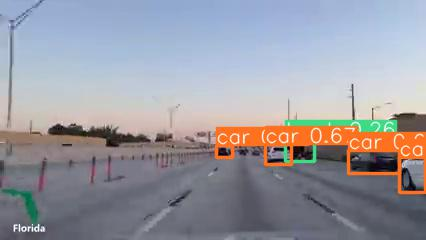

In [15]:
# LOOK AT THE FIRST IMAGE
Image("/content/runs/detect/exp/00050.jpg")

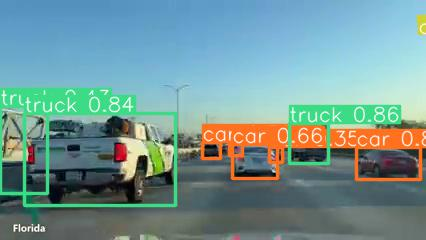

In [16]:
Image("/content/runs/detect/exp/00200.jpg")

#### Part-3.3: Explore the results  

The following code will plot the image and add a verticle line roughly down the center of the car's hood

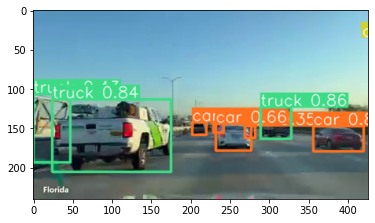

In [17]:
%matplotlib inline
plt.imshow(results.ims[1])
plt.show()

INFO:yolov5:image 1/2: 240x426 4 cars, 1 truck
image 2/2: 240x426 5 cars, 1 airplane, 3 trucks
Speed: 33.6ms pre-process, 446.5ms inference, 12.3ms NMS per image at shape (2, 3, 384, 640)
image 1/2: 240x426 4 cars, 1 truck
image 2/2: 240x426 5 cars, 1 airplane, 3 trucks
Speed: 33.6ms pre-process, 446.5ms inference, 12.3ms NMS per image at shape (2, 3, 384, 640)


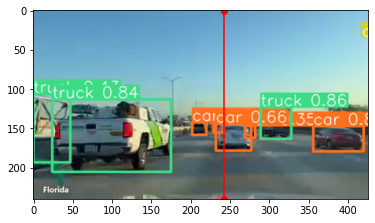

In [18]:
#PLOT IMAGE WITH REGIONAL SUB-DIVIDING LINES
def plot_lines(img):
    YMAX=img.shape[0]
    XMAX=img.shape[1]
    XCENTER=0.57*XMAX

    x1 = XCENTER; y1 = 0; x2 = XCENTER; y2 = YMAX 
    plt.plot([x1,x2], [y1,y2], marker = 'o',color="red")
    plt.imshow(img)
    plt.show()

results.print()
plot_lines(results.ims[1])

INFO:yolov5:image 1/2: 240x426 4 cars, 1 truck
image 2/2: 240x426 5 cars, 1 airplane, 3 trucks
Speed: 33.6ms pre-process, 446.5ms inference, 12.3ms NMS per image at shape (2, 3, 384, 640)
image 1/2: 240x426 4 cars, 1 truck
image 2/2: 240x426 5 cars, 1 airplane, 3 trucks
Speed: 33.6ms pre-process, 446.5ms inference, 12.3ms NMS per image at shape (2, 3, 384, 640)


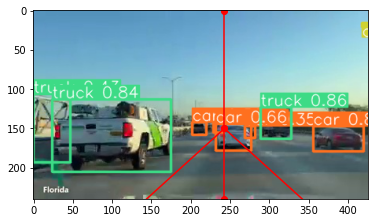

In [19]:
# INSERT CODE TO MODIFY THE FUNCTION TO GENERATE THE FOLLOWING IMAGE TO ROUGHLY ISOLATE THE LANE
# YOU CAN JUST USE GEOMETRY TO DO THIS
def plot_lines(img):
    YMAX=img.shape[0]
    XMAX=img.shape[1]
    XCENTER=0.57*XMAX

    x1 = XCENTER; y1 = 0; x2 = XCENTER; y2 = YMAX 
    plt.plot([x1,x2], [y1,y2], marker = 'o',color="red")
    plt.plot([x1,x2/2], [y1+150,y2+20], marker = 'o',color="red")
    plt.plot([x1,3*x2], [y1+150,y2+350], marker = 'o',color="red")
    plt.imshow(img)
    plt.show()

results.print()
plot_lines(results.ims[1])

Insert a function to output a modified version of the results.pandas().xyxy[i] data-frame in the following ways 

* normalize (scale) the xmin, xmax by the width of the image and ymin, ymax by the height --> HxW=1x1 
* compute the area and center of each box using the normalized coordinates
* add a column named "nearby" which is True if normalized_area>0.05
* **Optional**: Use The geometric lane construction from the previous image and the location of the box center to compute which lane (left,center,right) nearby vehicles are in
 
```
       xmin      ymin      xmax      ymax  confidence  ...   name nearby  \
0  0.677506  0.515625  0.771468  0.680202    0.859959  ...  truck  False   
1  0.831234  0.617149  0.977826  0.743249    0.851794  ...    car  False   
2  0.002621  0.457946  0.410202  0.926958    0.820941  ...  truck   True   
3  0.547734  0.598833  0.656238  0.750011    0.581989  ...    car  False   
4  0.473275  0.594087  0.518594  0.662508    0.503990  ...    car  False   

       area  x_center  y_center  
0  0.015464  0.724487  0.597913  
1  0.018485  0.904530  0.680199  
2  0.191160  0.206412  0.692452  
3  0.016403  0.601986  0.674422  
4  0.003101  0.495935  0.628297  
```

In [20]:
#INSERT CODE TO MODIFY THE DATAFRAME 
def modified(i):

  #normalize
  YMAX=results.ims[i].shape[0]
  XMAX=results.ims[i].shape[1]

  df = results.pandas().xyxy[1]
  df["xmax"] = (df["xmax"]/XMAX)
  df["xmin"] = (df["xmin"]/XMAX)
  df["ymax"] = (df["ymax"]/YMAX)
  df["ymin"] = (df["ymin"]/YMAX)
  df["m_area"] = (df["xmax"] - df["xmin"]) * (df["ymax"] - df["ymin"])
  df["x_center"] = (0.57*df["xmax"])
  df["y_center"] = (0.57*df["ymax"])
  df['nearby'] = np.where(df['m_area'] > 0.05, True, False)

  return df

In [37]:
modified(1).loc[1]['nearby']

False

### Part-3.4: Process all images

In [22]:
# INSERT CODE TO FORM AN ORDERED (SORTED) LIST OF ALL IMAGES IN "frames" 
import os
listimg = ['/content/gdrive/MyDrive/HW-3/frames/' + file for file in os.listdir('/content/gdrive/MyDrive/HW-3/frames/')]
sorted_list = sorted(listimg,key=lambda x: x[0])[:100]

In [23]:
# INSERT CODE TO RUN YOLO ON THE COMPLETE LIST
results = model(sorted_list)

In [39]:
len(results.ims)

100

In [24]:
results.save()

INFO:yolov5:Saved 100 images to runs/detect/exp2
Saved 100 images to runs/detect/exp2


### Part-3.5: Time-series analysis 

Loop over the results and build arrays with time-series data for the following 
* The frames should be ordered so you can treat the index as a "time" variables
* Total number num_cars and num_trucks in each frame
* num_neighbor = Number of neighboring cars and trucks (use normalized box area > .05 to signify a nearby car or truck)

In [61]:
# 3.5.1: INSERT CODE TO LOOP OVER RESULTS AND BUILD ARRAYS
num_cars = []
num_trucks = []
num_neighbor = []

for k in range(len(results.ims)):
  mod_df = modified(k)

  cars_c = 0
  trucks_c = 0
  nearby_c = 0

  row_num = mod_df.shape[0]

  for row in range(row_num):
    if mod_df.loc[row]['nearby'] == True:
      nearby_c += 1  
            
    if mod_df.loc[row]['name'] == 'car':
      cars_c += 1

    elif mod_df.loc[row]['name'] == 'truck':
      trucks_c += 1

    else:
      continue

  num_cars.append(cars_c)
  num_trucks.append(trucks_c)
  num_neighbor.append(nearby_c)

print('Cars: \n',num_cars,"\nTrucks: \n",num_trucks,"\nNearby: \n",num_neighbor)

Cars: 
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] 
Trucks: 
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3] 
Nearby: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


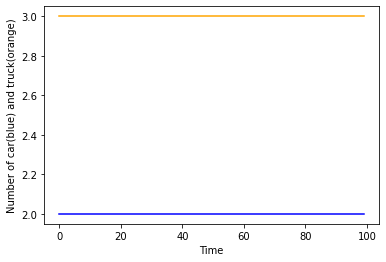

In [62]:
# INSERT CODE TO GENERATE THE FOLLOWING PLOT
time = np.arange(0,100,1)

plt.plot(time,num_cars,color="blue")
plt.plot(time,num_trucks,color="orange")
plt.xlabel("Time")
plt.ylabel("Number of car(blue) and truck(orange)")
plt.show()

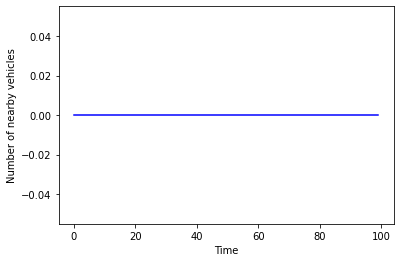

In [63]:
# INSERT CODE TO GENERATE THE FOLLOWING PLOT
time = np.arange(0,100,1)

plt.plot(time,num_neighbor,color="blue")
plt.xlabel("Time")
plt.ylabel("Number of nearby vehicles")
plt.show()

### Optional: Dynamic analysis (more advanced)

* Save more frames and see if you can write a script to track near-by neighboring cars from one frame to the next
  * Using this information, compute some measure of relative velocity of passing cars 
  * Plot this average velocity as a time series and discuss the meaning
* Research the mathematics of "perspective" and see if you can encode the math to predict an estimate for the distance to neighboring vehicles from the area of the box
  
